In [68]:
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

In [79]:
ec_coords = np.genfromtxt('data/GBM39_5k_coordinates.txt')
hsr_coords = np.genfromtxt('data/GBM39HSR_5k_coordinates.txt')

In [80]:
ec_hic = np.load('data/GBM39ec_5k_collapsed_matrix.npy')
hsr_hic = np.load('data/GBM39HSR_5k_collapsed_matrix.npy')
ec_hic.shape, hsr_hic.shape

((251, 251), (251, 251))

In [81]:
dist_matrix = distance_matrix(ec_coords, ec_coords)
dist_matrix

array([[0.        , 0.01543365, 0.03082205, ..., 0.05539887, 0.04083208,
        0.02575682],
       [0.01543365, 0.        , 0.01546108, ..., 0.07068806, 0.0562215 ,
        0.04113406],
       [0.03082205, 0.01546108, 0.        , ..., 0.08573747, 0.07148551,
        0.05635993],
       ...,
       [0.05539887, 0.07068806, 0.08573747, ..., 0.        , 0.01536143,
        0.02971846],
       [0.04083208, 0.0562215 , 0.07148551, ..., 0.01536143, 0.        ,
        0.015355  ],
       [0.02575682, 0.04113406, 0.05635993, ..., 0.02971846, 0.015355  ,
        0.        ]])

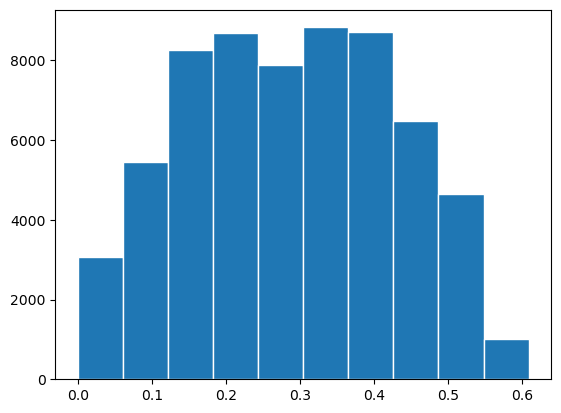

In [82]:
plt.hist(dist_matrix.flatten(), ec='w')
plt.show()

In [83]:
dist_matrix_rounded = np.ceil(dist_matrix / 0.05) * 0.05
dist_matrix_rounded

array([[0.  , 0.05, 0.05, ..., 0.1 , 0.05, 0.05],
       [0.05, 0.  , 0.05, ..., 0.1 , 0.1 , 0.05],
       [0.05, 0.05, 0.  , ..., 0.1 , 0.1 , 0.1 ],
       ...,
       [0.1 , 0.1 , 0.1 , ..., 0.  , 0.05, 0.05],
       [0.05, 0.1 , 0.1 , ..., 0.05, 0.  , 0.05],
       [0.05, 0.05, 0.1 , ..., 0.05, 0.05, 0.  ]])

In [84]:
unique_distances = np.unique(dist_matrix_rounded)
norm_ec_hic = ec_hic.copy()

distance_medians = {}

for d in unique_distances:
    mask = dist_matrix_rounded == d
    distance_medians[d] = np.median(norm_ec_hic[mask])
    norm_ec_hic[mask] = np.clip(norm_ec_hic[dist_matrix_rounded == d] - distance_medians[d], a_min=0, a_max=None)
    
sorted_medians = sorted(distance_medians.items())

for dist, med in sorted_medians:
    print(f"Distance: {dist.round(2)}, Median: {med}")

Distance: 0.0, Median: 1058.0396976690447
Distance: 0.05, Median: 773.5146978141281
Distance: 0.1, Median: 301.27798123205577
Distance: 0.15, Median: 183.7480286996464
Distance: 0.2, Median: 137.18469681151652
Distance: 0.25, Median: 105.23090413382675
Distance: 0.3, Median: 84.11385825934103
Distance: 0.35, Median: 69.84959899062059
Distance: 0.4, Median: 64.27660517138054
Distance: 0.45, Median: 56.31179415013789
Distance: 0.5, Median: 52.43669210552157
Distance: 0.55, Median: 49.900003522591476
Distance: 0.6, Median: 47.060616832135764
Distance: 0.65, Median: 49.11370509519037


In [85]:
(norm_ec_hic == 0).mean()

0.5000555546737353

In [87]:
def build_adj(coords, hic, bin_width = 0.05):
    dist_matrix = distance_matrix(coords, coords)
    dist_matrix_rounded = np.ceil(dist_matrix / bin_width) * bin_width
    unique_distances = np.unique(dist_matrix_rounded)
    
    distance_medians = {}
    norm_hic = hic.copy()

    for d in unique_distances:
        mask = dist_matrix_rounded == d
        distance_medians[d] = np.median(hic[mask])
        norm_hic[mask] = np.clip(norm_hic[dist_matrix_rounded == d] - distance_medians[d], a_min=0, a_max=None)

    return norm_hic

In [89]:
ec_adj = build_adj(ec_coords, ec_hic)
hsr_adj = build_adj(hsr_coords, hsr_hic)

<Axes: >

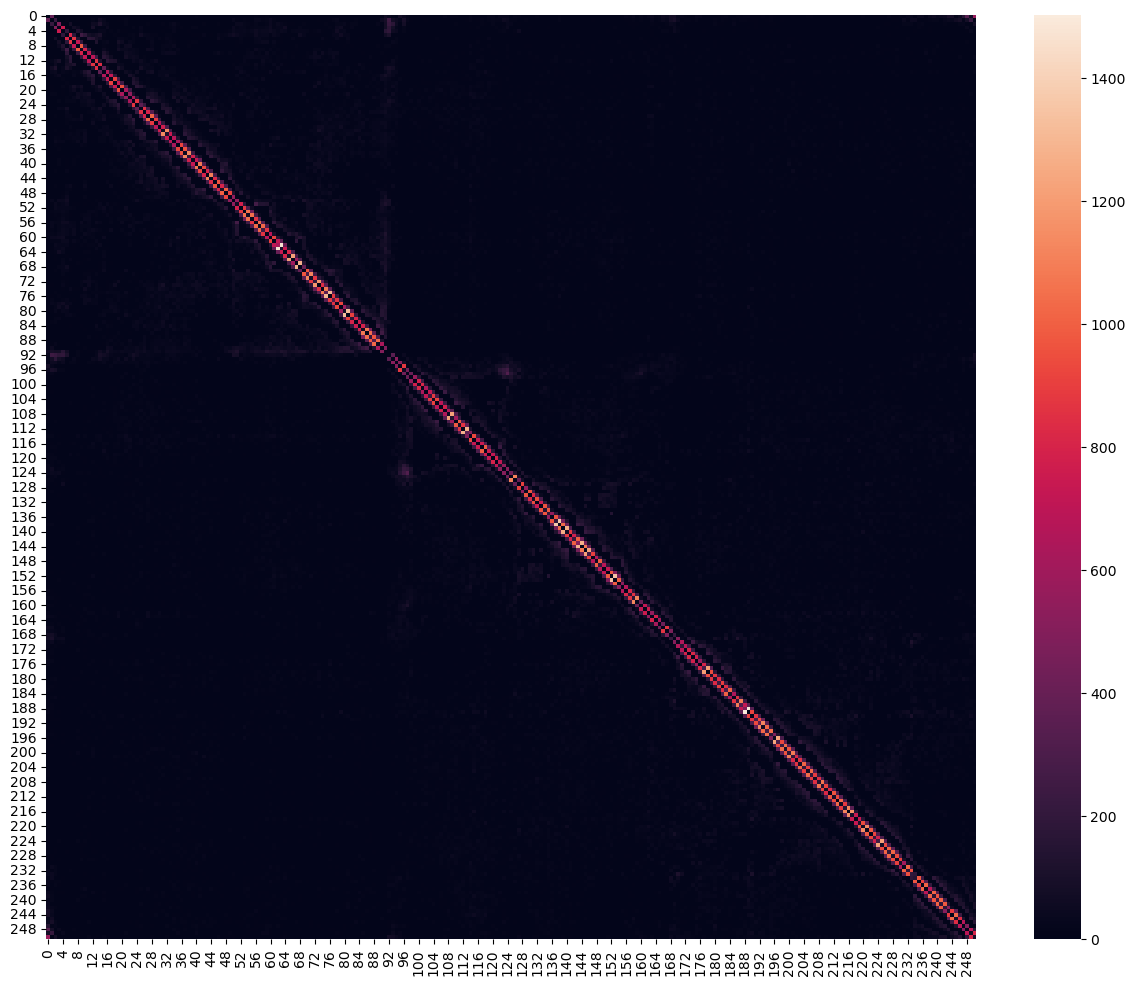

In [100]:
import seaborn as sns

plt.figure(figsize=(15, 12))
sns.heatmap(ec_adj)

<Axes: >

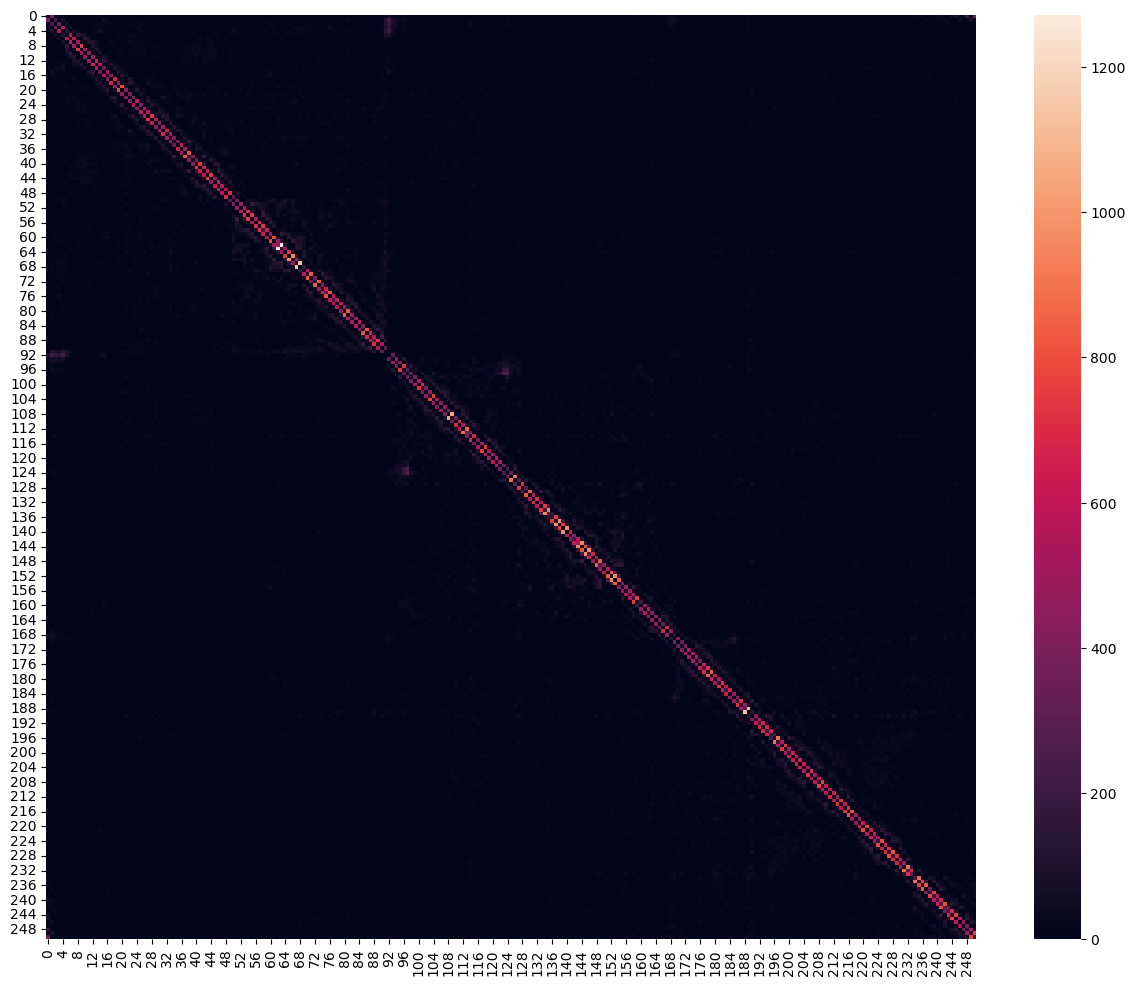

In [101]:
plt.figure(figsize=(15, 12))
sns.heatmap(hsr_adj)

<Axes: >

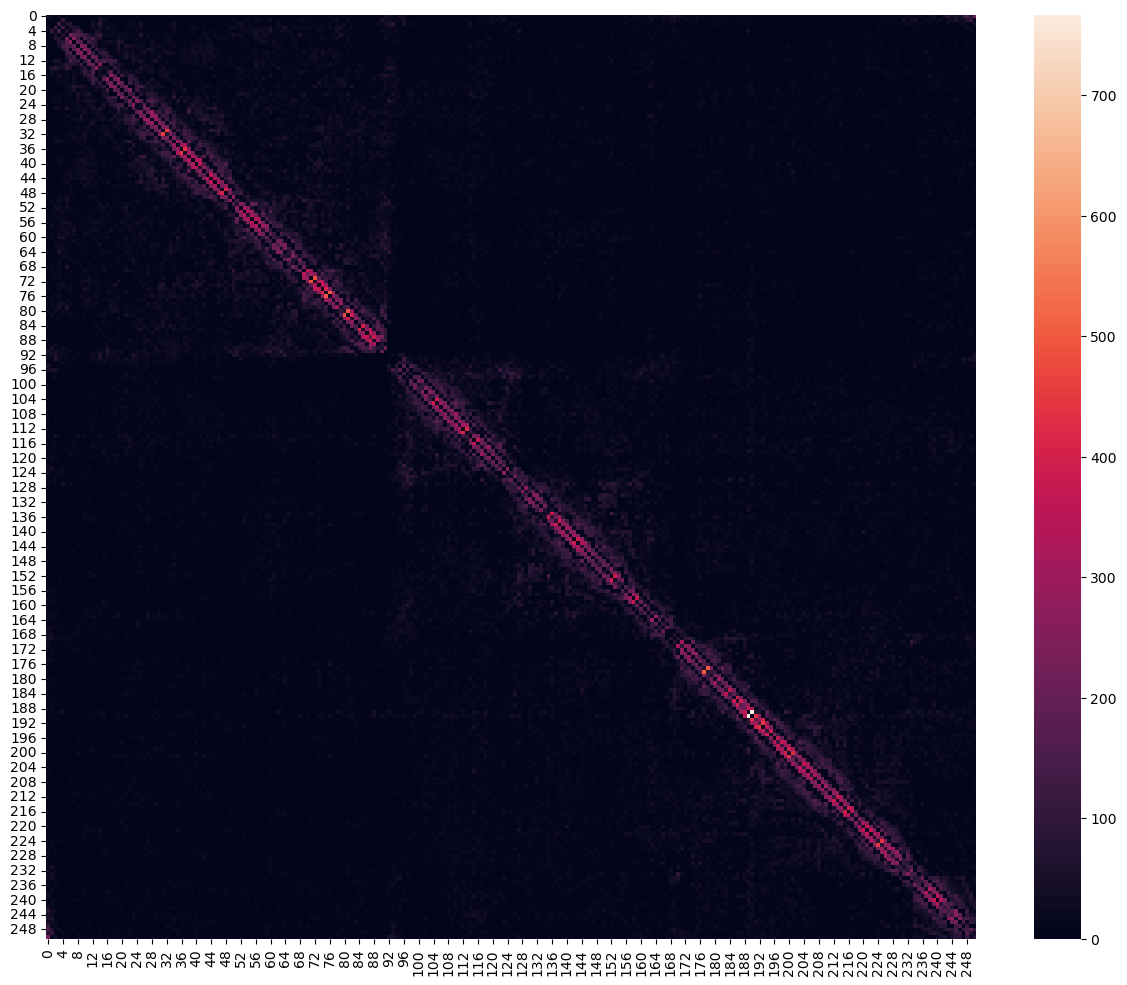

In [102]:
plt.figure(figsize=(15, 12))
sns.heatmap(np.abs(hsr_adj - ec_adj))

In [103]:
np.save('data/hsr_adj_mat.npy', hsr_adj)
np.save('data/ec_adj_mat.npy', ec_adj)